# Instalando o Pycaret

In [43]:
#!pip install pycaret

In [44]:
#!pip install scipy

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import shap
from pycaret.regression import *
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Tratando a base

In [2]:
df= pd.read_excel("Base_novo_teste.xlsx")

In [3]:
df = df[['qtd_abertas_Empresario_Individual','Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','taxa_homicidio','RH_adm_dir','ISH','densidade_banda_larga','densidade_telefonia_movel','qtd_cursos_engenharias',
    'qtd_cursos_negocios_direito','media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO','valor_medio_recebido_familia','pib_per_capita_preco_corrente','perc_20_59_anos','pop_total','total_sim_tecnologia','porte_municipio']]

In [4]:
df.head()

,qtd_abertas_Empresario_Individual,Mecanismos_incentivo,Reducao_IPTU,Isencao_IPTU,Reducao_ISSQN,Isencao_ISSQN,Isencao_Tx,Cessao_terrenos,Doacao_terrenos,Outros_mecanismos,...,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,media_NU_NOTA_REDACAO,valor_medio_recebido_familia,pib_per_capita_preco_corrente,perc_20_59_anos,pop_total,total_sim_tecnologia,porte_municipio
0,194,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,504.034091,491.079545,543.558537,621.363636,18495,25091.18,0.587227,22516,18.0,2
1,1275,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,Sim,...,495.727950,484.710248,518.811149,584.534161,17615,25730.20,0.591797,111148,12.0,4
2,49,Sim,Não,Não,Não,Sim,Não,Não,Não,Sim,...,486.071429,447.628571,522.883333,471.428571,18956,32226.25,0.584567,5067,8.0,1
3,1258,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,Não,...,505.006061,490.991919,533.458933,611.717172,19376,29331.29,0.595584,86416,17.0,3
4,257,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,...,477.045714,454.722857,480.696875,576.571429,17752,37069.25,0.598272,16088,8.0,2


In [5]:
df['qtd_cursos_engenharias'] = df['qtd_cursos_engenharias'].fillna(0)

df['qtd_cursos_negocios_direito'] = df['qtd_cursos_negocios_direito'].fillna(0)

df['total_sim_tecnologia'] = df['total_sim_tecnologia'].fillna(0)

df['taxa_homicidio'] = df['taxa_homicidio'].fillna(0)

df['RH_adm_dir'] = df['RH_adm_dir'].fillna(0)

In [6]:
df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']] = df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']].fillna('Não')

In [7]:
df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']] = df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].fillna(df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].median())


In [8]:
df = pd.get_dummies(df, columns = ['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','ISH'], drop_first=True)

In [9]:
df = df[np.isfinite(df).all(1)]

# Dividindo em treino e test

In [10]:
# vamos separar duas bases, uma para treino e outra para teste
treino = df.sample(frac=.8, random_state=123)
treino.reset_index(inplace=True, drop=True)


teste = df.drop(treino.index)
teste.reset_index(inplace=True, drop=True)

print(treino.shape, teste.shape)

#peguei esse do colab que compartilhou comigo, depois queria entender a formatação dele

(4456, 31) (1114, 31)


In [11]:
treino = treino.drop('porte_municipio', axis = 1)
teste= teste.drop('porte_municipio', axis = 1)

In [12]:
teste= teste.drop('qtd_abertas_Empresario_Individual', axis = 1)

In [13]:
teste

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Reducao_ISSQN_Sim,Isencao_ISSQN_Sim,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima
0,4.0,383.0,1.922125,69.773965,0.0,1.0,475.178571,484.866667,458.886667,518.700000,...,0,0,1,0,0,0,0,0,1,0
1,0.0,222.0,31.351351,78.750000,0.0,0.0,465.988235,470.173684,443.521053,472.776471,...,0,0,1,1,0,0,0,0,0,0
2,0.0,202.0,28.565121,65.540839,0.0,0.0,462.850000,559.180000,504.800000,519.875000,...,0,0,0,1,0,0,0,0,0,0
3,0.0,375.0,18.164359,69.336641,0.0,0.0,461.700000,522.453333,481.893333,473.166667,...,0,0,0,0,0,1,0,0,1,0
4,0.0,526.0,16.468120,61.167304,0.0,0.0,488.635714,488.068750,482.718750,506.635714,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,1.0,528.0,6.423907,106.821408,4.0,12.0,449.954054,479.917073,473.014634,516.186486,...,0,0,0,0,0,0,0,1,0,0
1110,0.0,394.0,8.442568,104.276827,0.0,0.0,450.285714,464.383333,457.593333,504.085714,...,0,0,1,0,1,0,0,0,1,0
1111,0.0,403.0,1.240118,66.485816,0.0,0.0,431.645455,443.025000,426.491667,445.027273,...,0,0,0,1,1,0,0,0,0,0
1112,0.0,344.0,7.187342,39.892274,0.0,0.0,432.055556,417.394737,428.821053,460.816667,...,0,0,0,1,0,0,0,0,0,0


# Pycaret

## Setup

In [14]:
regression_setup = setup(data = treino, target = 'qtd_abertas_Empresario_Individual', session_id = 42)

,Description,Value
0,Session id,42
1,Target,qtd_abertas_Empresario_Individual
2,Target type,Regression
3,Original data shape,"(4456, 30)"
4,Transformed data shape,"(4456, 30)"
5,Transformed train set shape,"(3119, 30)"
6,Transformed test set shape,"(1337, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


## Comparando Modelos 

### Usando RMSE

In [15]:
best_model = compare_models(sort = 'RMSE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,139.9968,337205.6043,559.7105,0.9445,0.7213,0.7337,0.2640
omp,Orthogonal Matching Pursuit,183.9632,339521.9721,566.4246,0.9453,1.0505,1.8901,0.2640
br,Bayesian Ridge,182.6063,540398.8280,663.1367,0.9400,1.0636,2.1163,0.2360
lr,Linear Regression,188.9484,541416.3189,663.8736,0.9398,1.0980,2.2456,1.1200
ridge,Ridge Regression,188.4810,542499.6543,664.4356,0.9398,1.0805,2.2325,0.2520
lasso,Lasso Regression,187.5543,544587.0467,665.5142,0.9397,1.0843,2.2220,0.5740
llar,Lasso Least Angle Regression,187.5544,544588.1810,665.5149,0.9397,1.0843,2.2220,0.2520
en,Elastic Net,183.7372,545752.6114,665.9341,0.9398,1.0800,2.1531,0.2520
lar,Least Angle Regression,198.2431,623234.9995,712.0021,0.9329,1.0995,2.3414,0.3220
rf,Random Forest Regressor,123.3450,1601476.5796,886.7625,0.9102,0.4050,0.3840,0.2880


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [16]:
# verificando os hiperparâmetros do modelo 

print(best_model)

HuberRegressor()


In [17]:
best_model = create_model('huber', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,160.0052,706562.7665,840.5729,0.9716,0.7506,0.7117
1,148.8067,336437.9138,580.0327,0.9294,0.7405,0.7851
2,137.1847,239769.7665,489.6629,0.9802,0.7142,0.6500
3,132.3042,260327.7778,510.2233,0.9181,0.7124,0.7976
4,121.6835,142929.7967,378.0606,0.9235,0.6886,0.7243
Mean,139.9968,337205.6043,559.7105,0.9445,0.7213,0.7337
Std,13.2696,194716.3757,154.6926,0.0260,0.0220,0.0535


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Plotando alguns graficos 

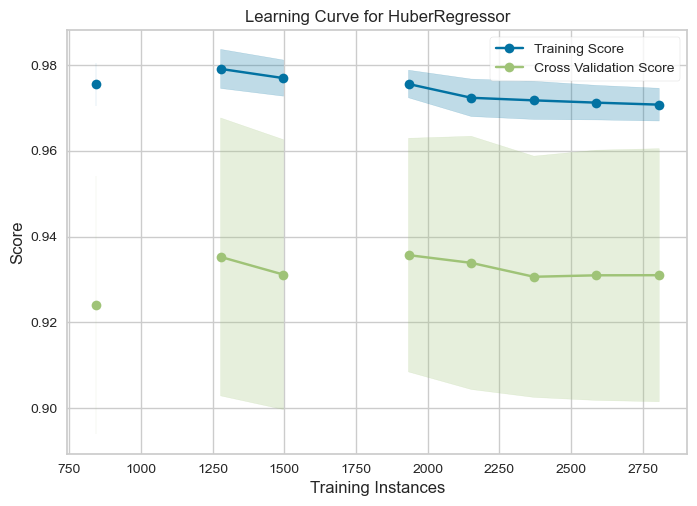

In [20]:
plot_model(best_model, plot = 'learning')

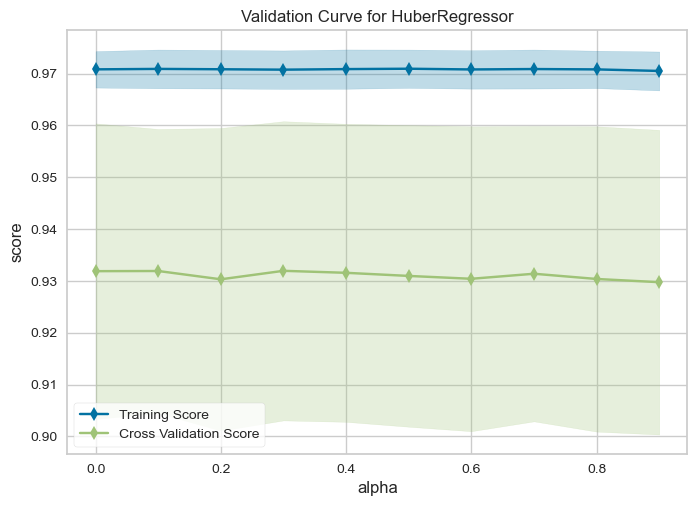

In [19]:
plot_model(best_model, plot='vc')

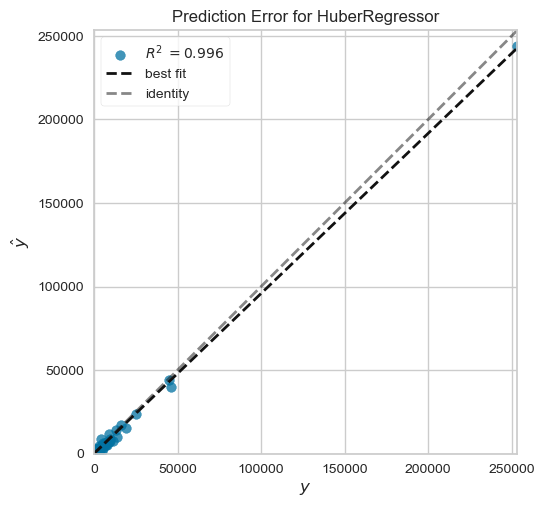

In [21]:
plot_model(best_model, plot='error')

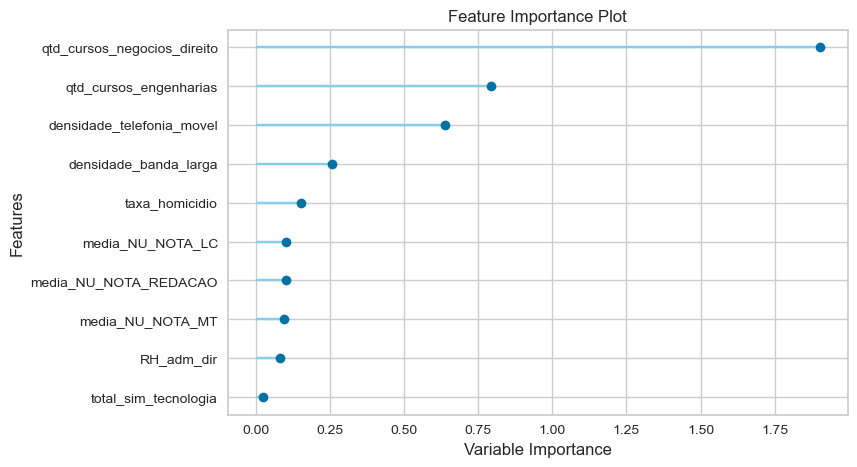

In [22]:
plot_model(best_model, plot='feature')

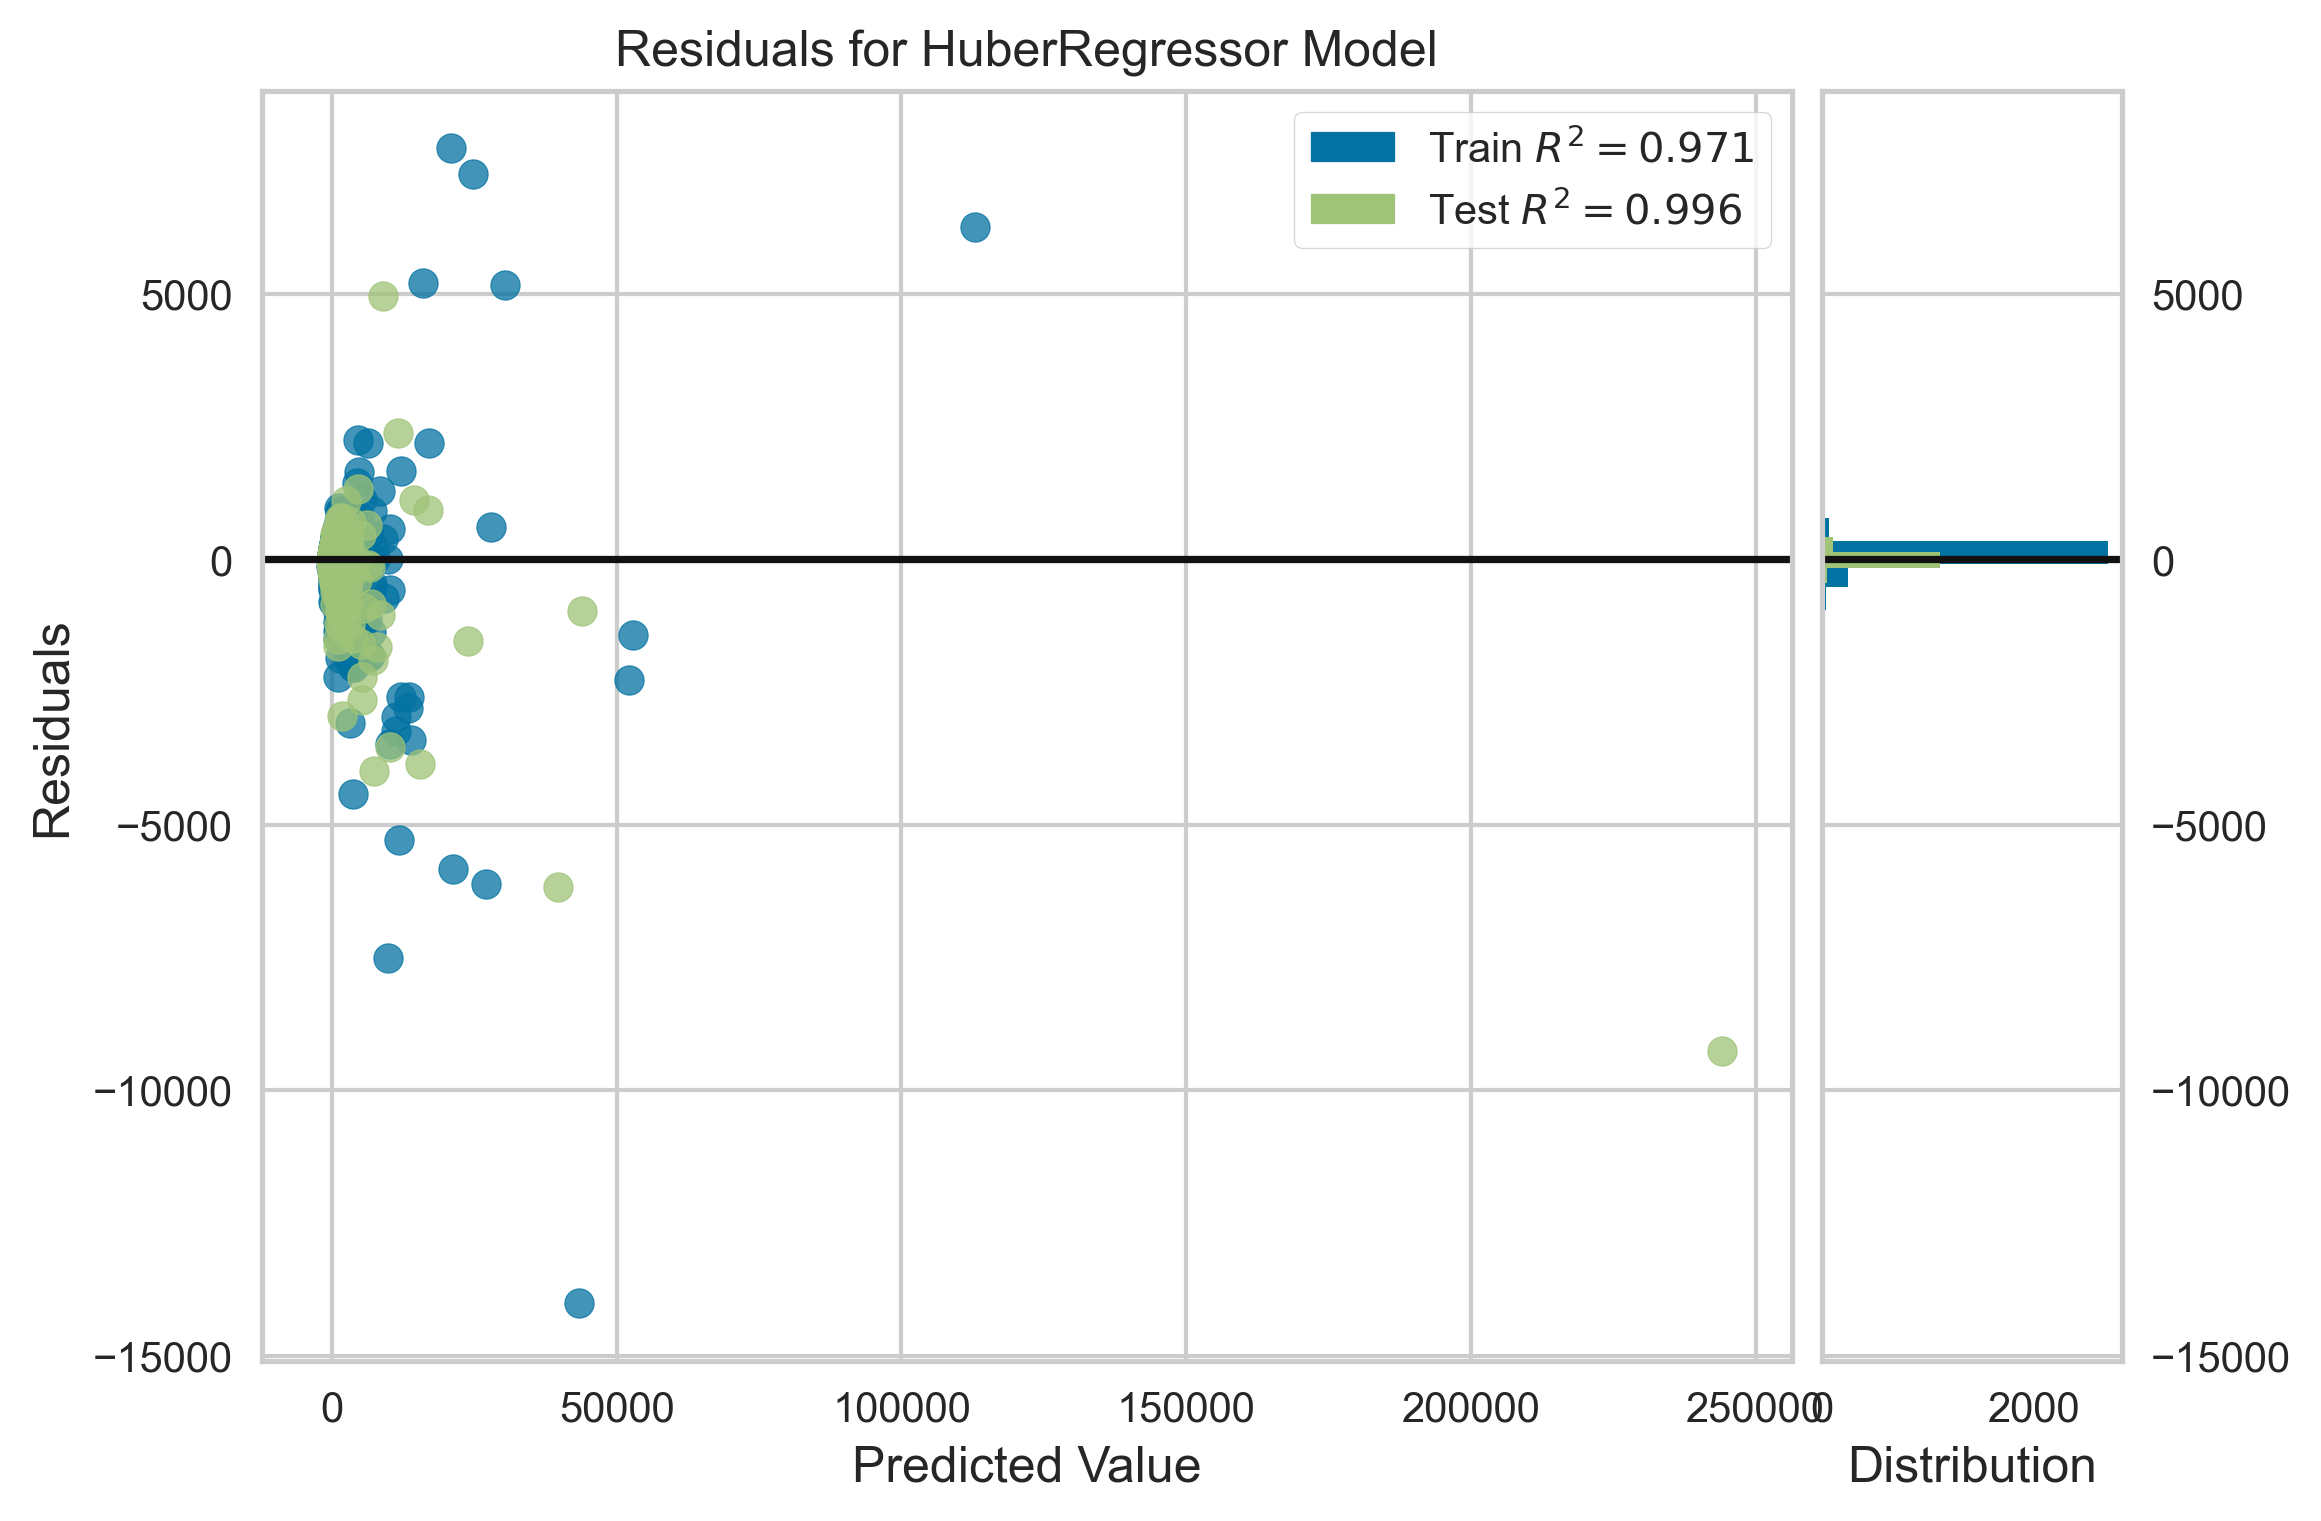

In [23]:
plot_model(best_model, plot='residuals',  scale = 3)

In [24]:
# O Huber regression não funciona no Shap 

#interpret_model(best_model, plot = 'summary')

In [25]:
# O Huber regression não funciona no Shap 

#interpret_model(best_model, plot = 'correlation') #feature = 'pop_total'

In [26]:
# O Huber regression não funciona no Shap

#interpret_model(best_model, plot='reason', observation=1)

In [27]:
# O Huber regression não funciona no Shap

#interpret_model(best_model, plot='reason', observation=3)

### Tunando o modelo - RMSE

In [28]:
# em alguns tutoriais vi que não fizeram nenhuma modificação manual dos parametros, e eles já modificavam. 
#Esse parece que não conteceu do mesmo jeito. 

tuned_RF = tune_model(best_model, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,155.5757,586067.1198,765.5502,0.9764,0.6565,0.5803
1,149.5588,329927.4434,574.3931,0.9307,0.7279,0.8934
2,138.3109,240287.1436,490.1909,0.9801,0.6979,0.6768
3,129.7300,245572.6015,495.5528,0.9227,0.7287,0.7259
4,121.6597,143564.6067,378.8992,0.9232,0.6888,0.7189
Mean,138.9670,309083.7830,540.9173,0.9466,0.7000,0.7191
Std,12.4365,150543.9953,128.4224,0.0260,0.0269,0.1015


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [29]:
#estranho, era para monstrar o que foi testado de diferente com o tuned, parece que esta igual.
#Sem falar que os resultados parecem piores depois de tunar 

print(tuned_RF)

HuberRegressor(alpha=0.7, epsilon=1.5)


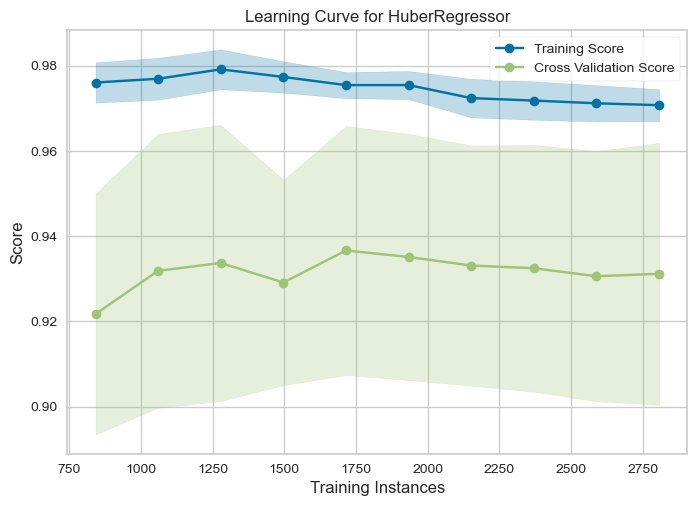

In [30]:
plot_model(tuned_RF, plot = 'learning')  #use_train_data = True

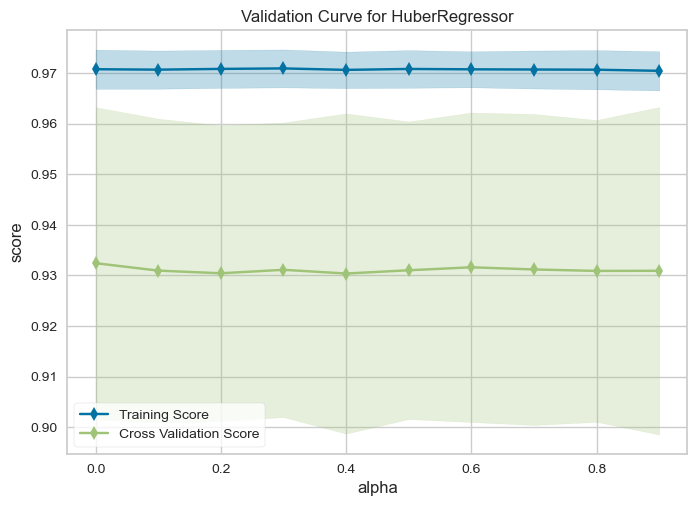

In [31]:
# Validation Curve
plot_model(tuned_RF, plot='vc')


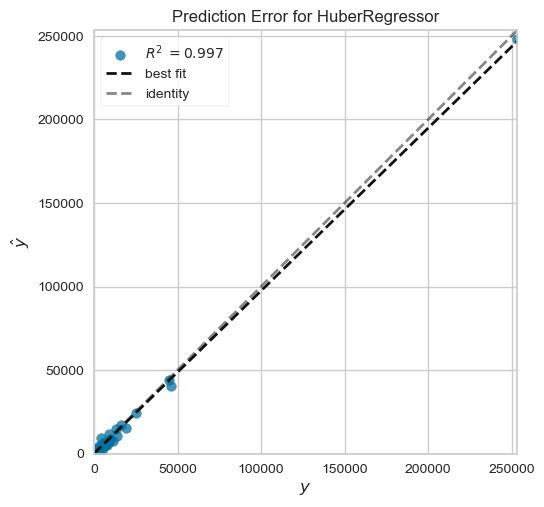

In [32]:
plot_model(tuned_RF, plot='error')


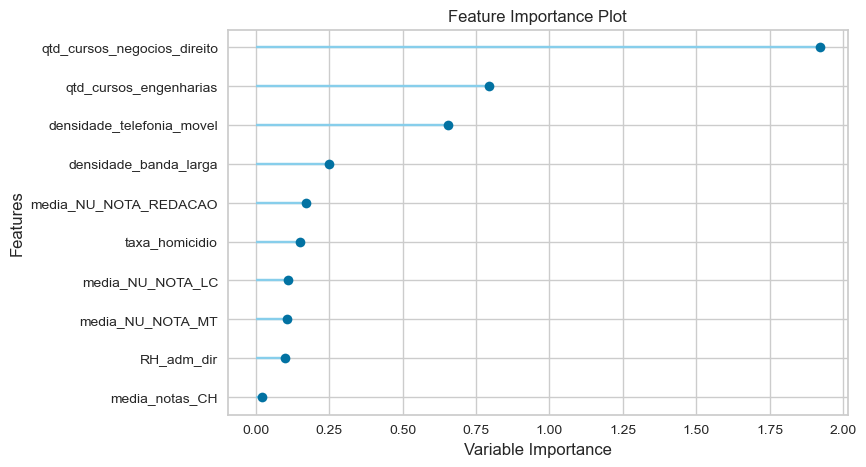

In [33]:
plot_model(tuned_RF, plot='feature')

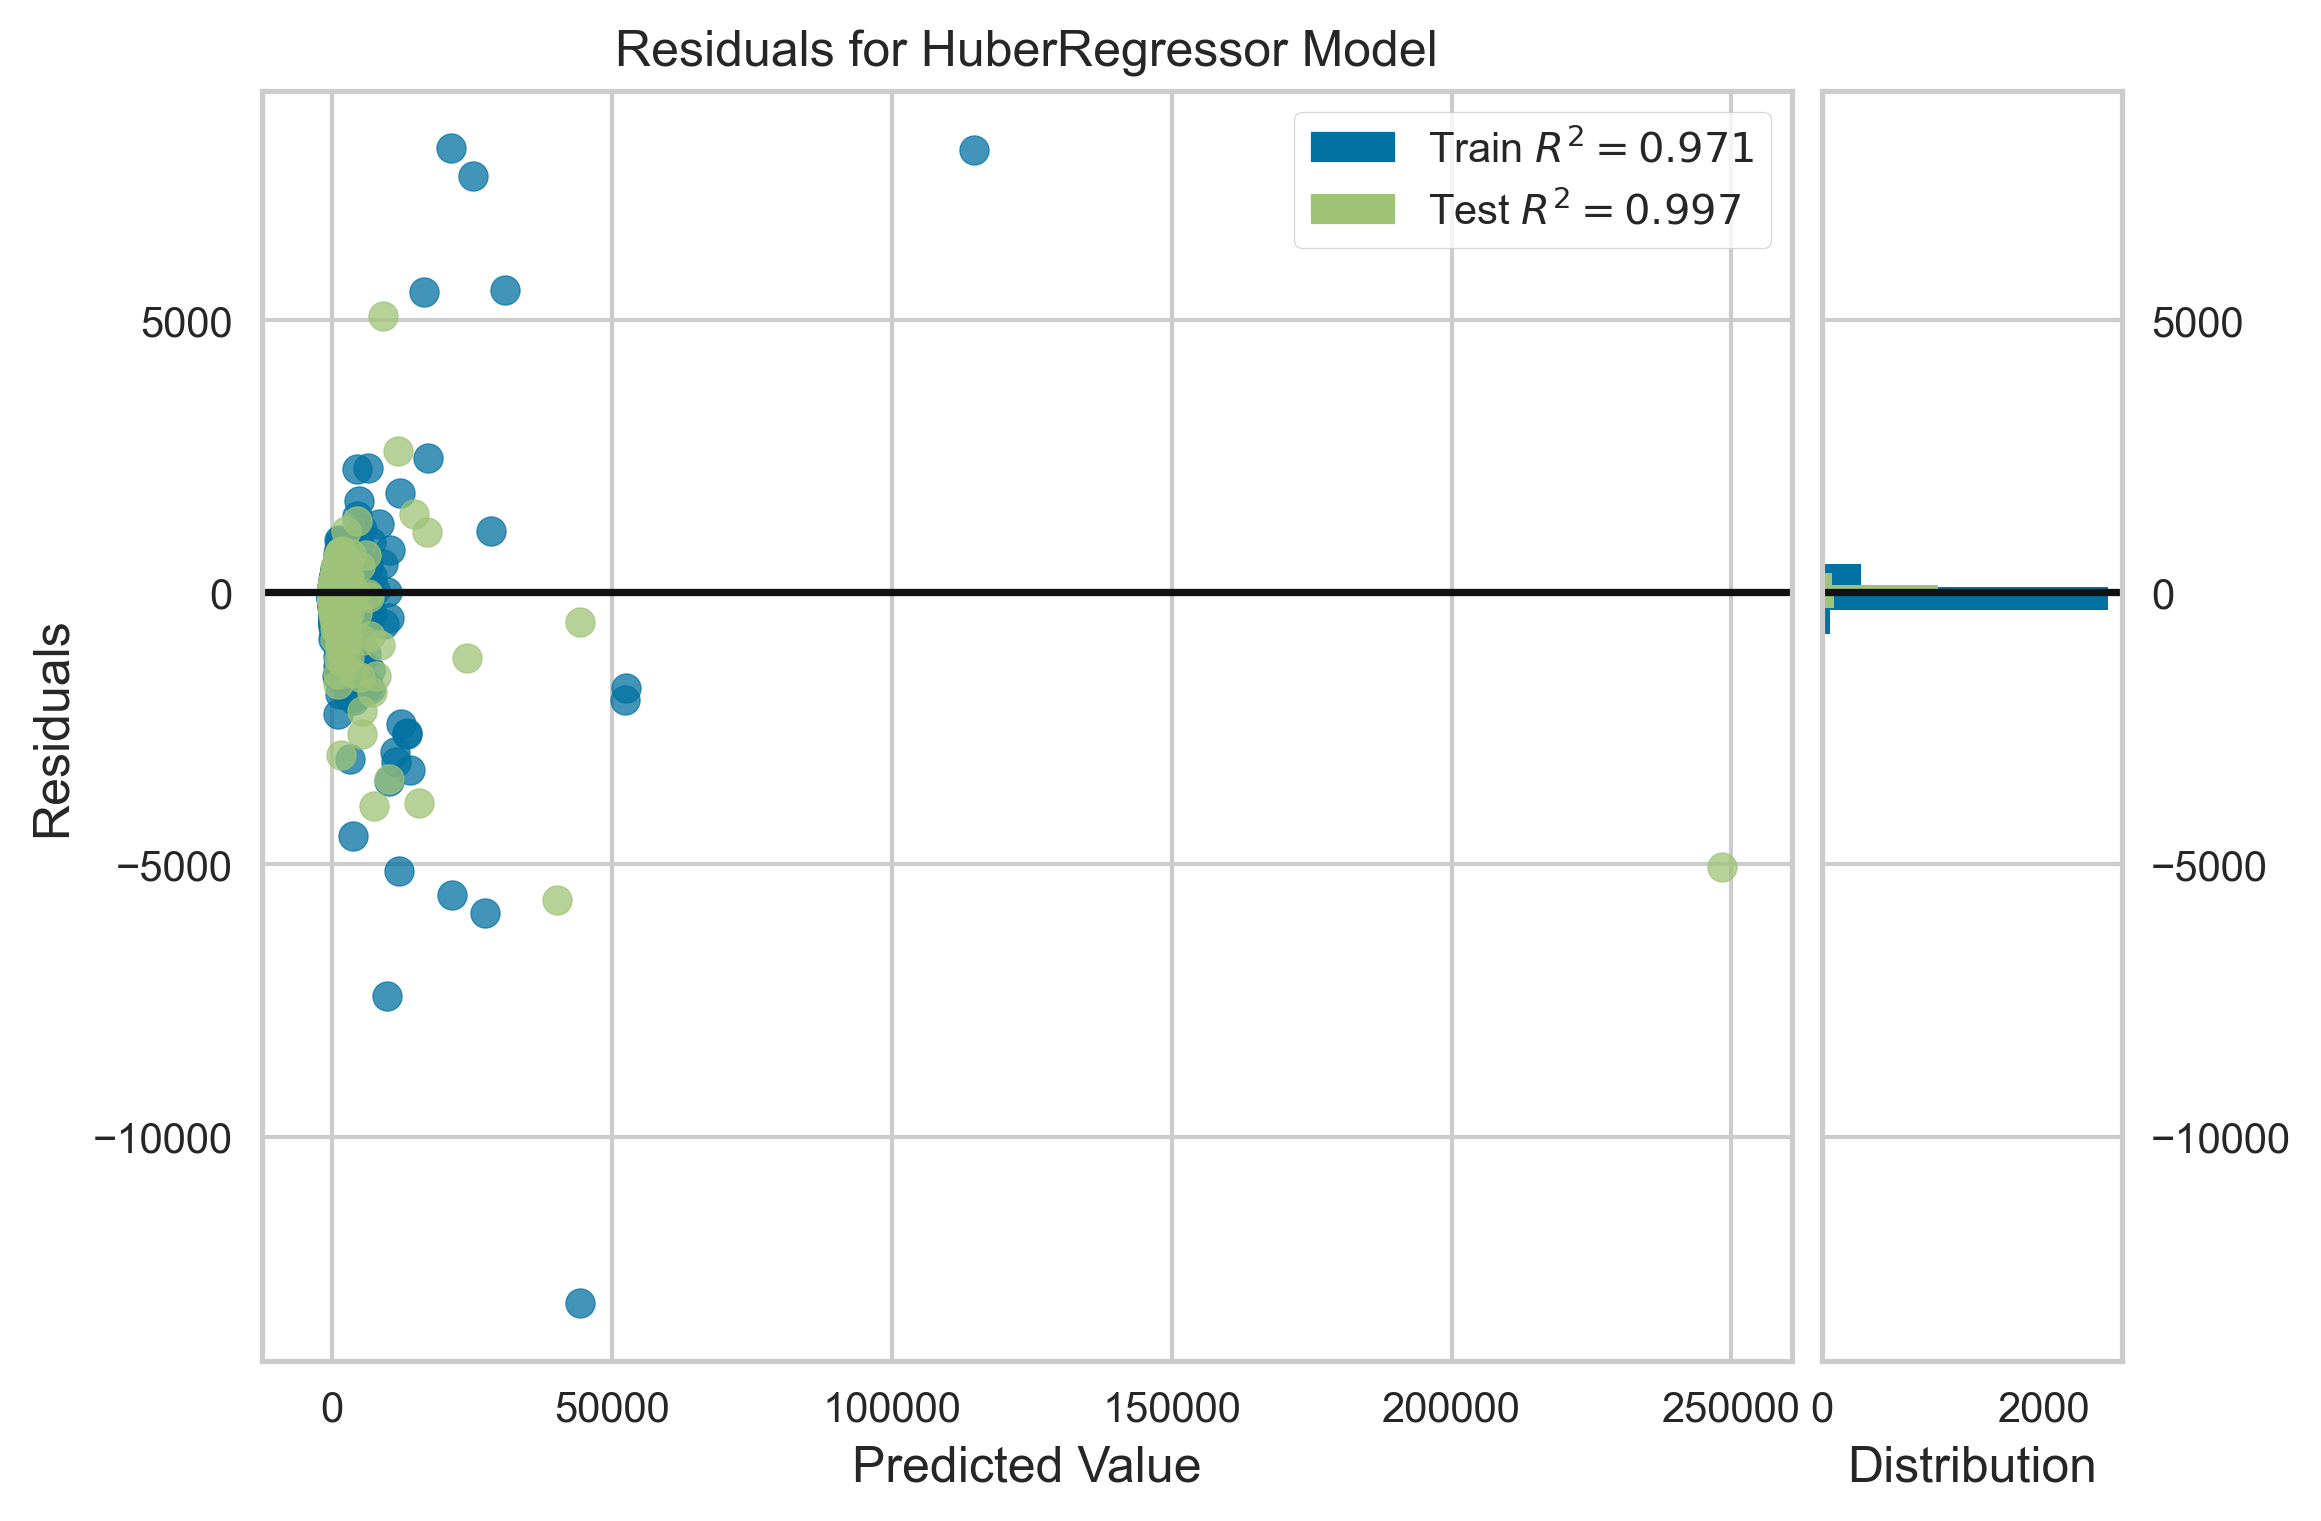

In [34]:
plot_model(tuned_RF, plot='residuals',  scale = 3)
 

In [33]:
#plot_model(tuned_RF, plot='cooks')

In [34]:
# Manifold Learning
#plot_model(tuned_RF, plot='manifold')

In [35]:
# O Huber regression não funciona no Shap

#interpret_model(tuned_RF, plot = 'summary')

In [36]:
# O Huber regression não funciona no Shap

#interpret_model(tuned_RF, plot = 'correlation') #feature = 'pop_total'

In [37]:
# O Huber regression não funciona no Shap

#interpret_model(tuned_RF, plot='reason', observation=1)

In [38]:
# O Huber regression não funciona no Shap

#interpret_model(tuned_RF, plot='reason', observation=3)

### Tunando escolhendo alguns parametros - RMSE

Tentei fazer o mesmo que no colab que compartilhou comigo e definir um dicionario com os parametros 

In [49]:
param_grid ={'alpha': [0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'epsilon': [1.3, 1.5, 1.8, 2.0]}

tuned_RF_2 = tune_model(best_model, custom_grid=param_grid, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,157.0231,598119.5619,773.3819,0.9759,0.7023,0.6026
1,148.8766,328851.8988,573.4561,0.9309,0.7139,0.8739
2,135.9042,217428.5026,466.2923,0.9820,0.6556,0.6303
3,130.0865,247700.2927,497.6950,0.9221,0.7098,0.7411
4,121.5036,140026.3078,374.2009,0.9251,0.6986,0.7362
Mean,138.6788,306425.3128,537.0052,0.9472,0.6960,0.7168
Std,12.7830,157889.9463,134.3529,0.0262,0.0209,0.0961


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [50]:
tuned_RF_2

HuberRegressor(alpha=0.4, epsilon=1.8)

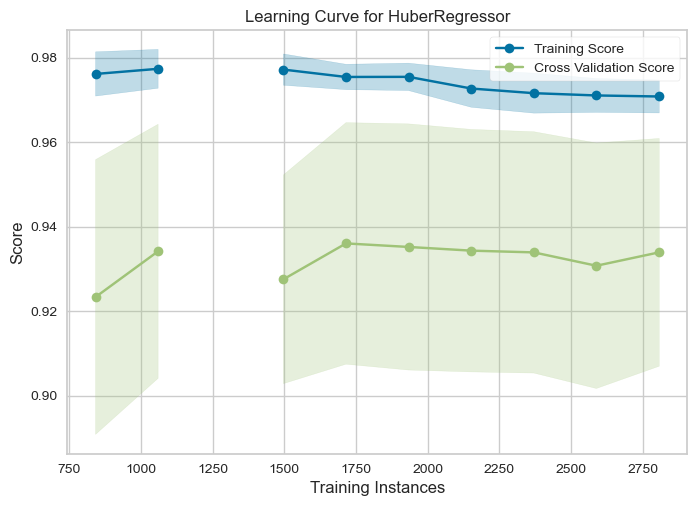

In [51]:
plot_model(tuned_RF_2 , plot = 'learning')

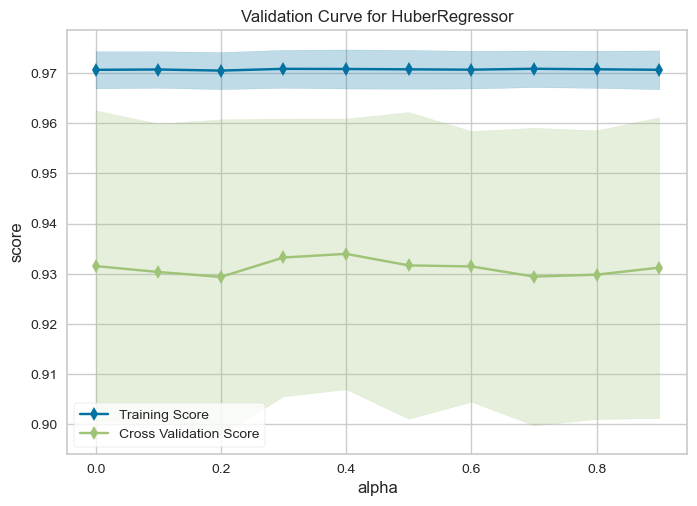

In [52]:
plot_model(tuned_RF_2 , plot='vc')

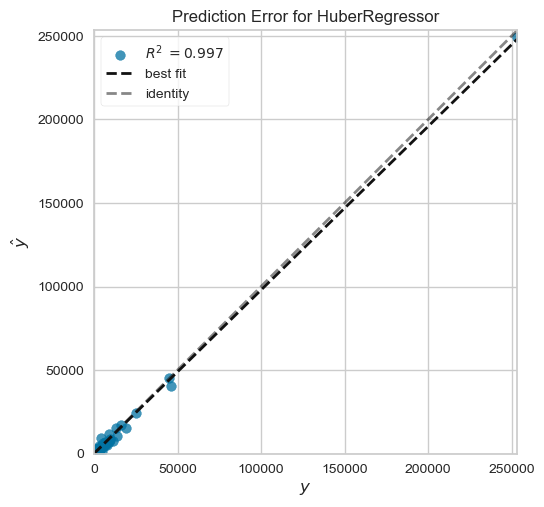

In [53]:
plot_model(tuned_RF_2 , plot='error')

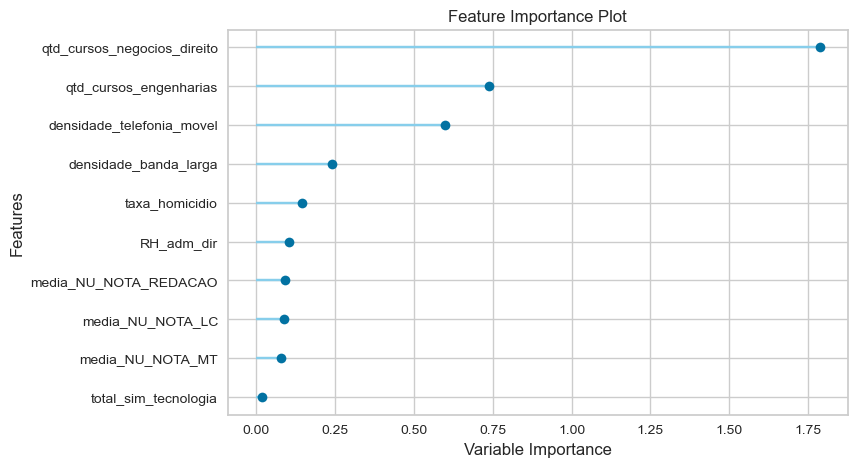

In [54]:
plot_model(tuned_RF_2 , plot='feature')

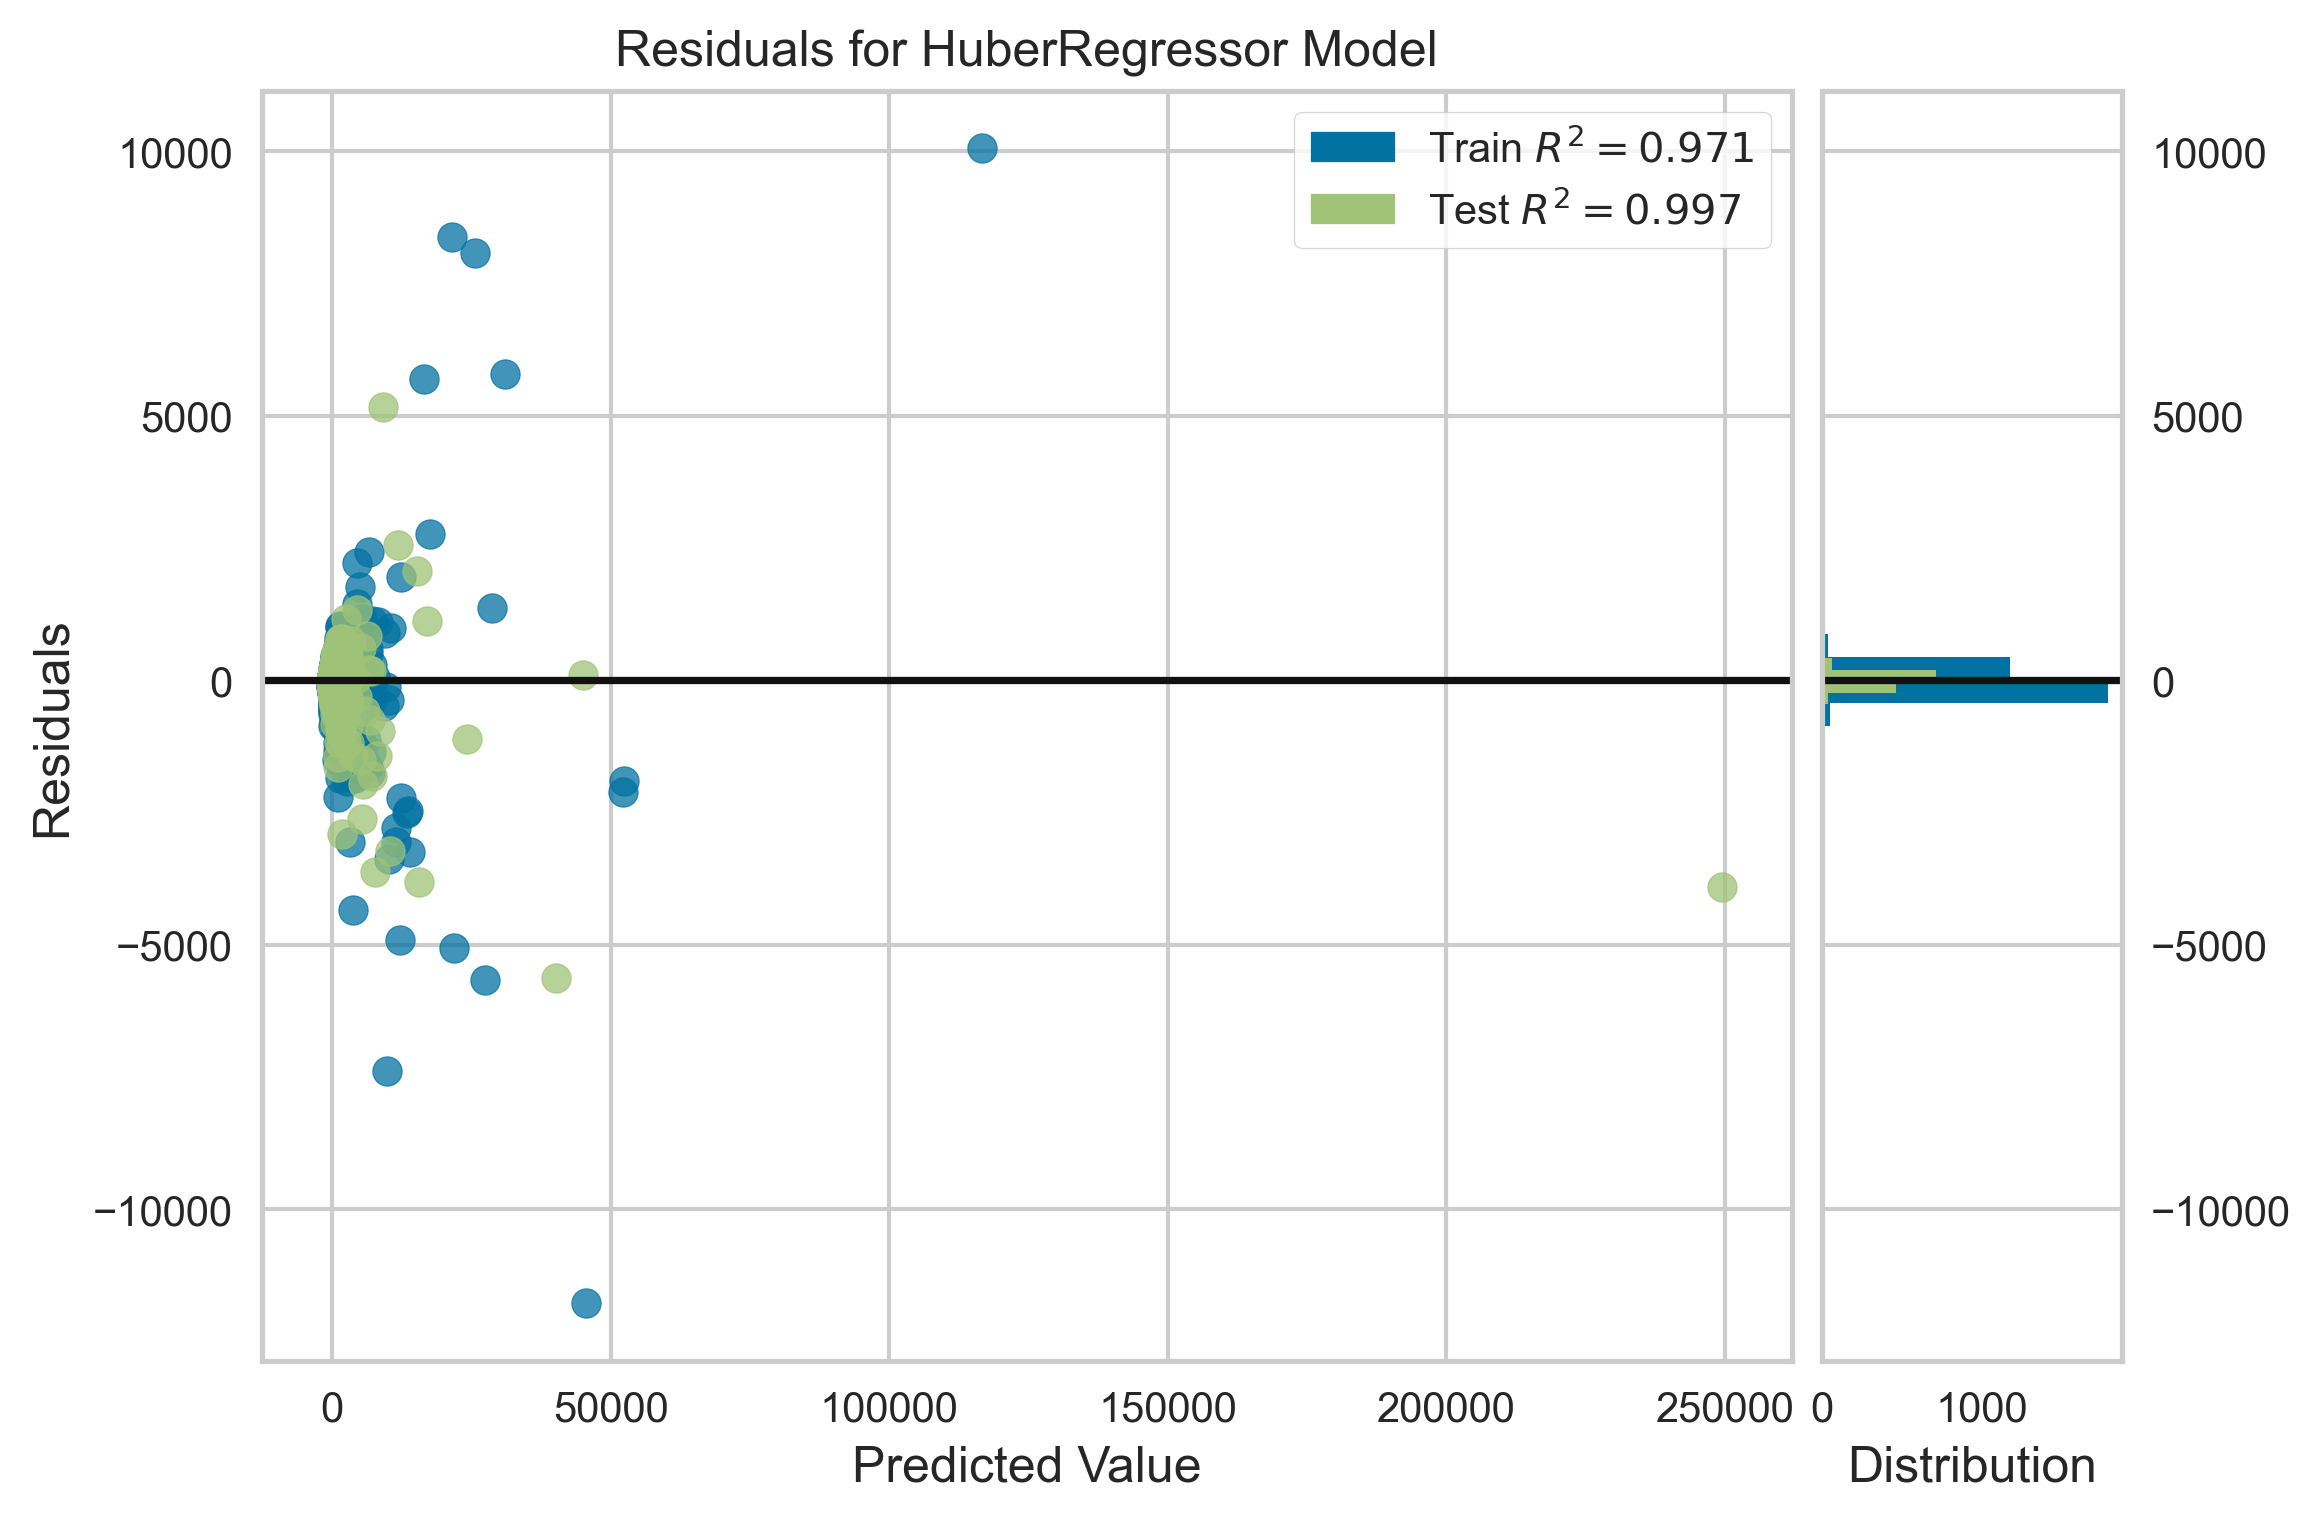

In [55]:
plot_model(tuned_RF_2 , plot='residuals',  scale = 3)

In [43]:
# O Huber regression não funciona no Shap

#interpret_model(tuned_RF_2 , plot = 'summary')

In [44]:
# O Huber regression não funciona no Shap

#interpret_model(tuned_RF_2 , plot = 'correlation') #feature = 'pop_total'

In [45]:
# O Huber regression não funciona no Shap

#interpret_model(tuned_RF_2 , plot='reason', observation=1)

In [46]:
# O Huber regression não funciona no Shap

#interpret_model(tuned_RF_2 , plot='reason', observation=3)

### Previsão RMSE

In [56]:
pred = predict_model(tuned_RF_2, data = teste)

In [57]:
pred

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_ISSQN_Sim,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,prediction_label
0,4.0,383.0,1.922125,69.773964,0.0,1.0,475.178558,484.866669,458.886658,518.700012,...,0,1,0,0,0,0,0,1,0,118.821471
1,0.0,222.0,31.351351,78.750000,0.0,0.0,465.988220,470.173676,443.521057,472.776459,...,0,1,1,0,0,0,0,0,0,41.990088
2,0.0,202.0,28.565121,65.540840,0.0,0.0,462.850006,559.179993,504.799988,519.875000,...,0,0,1,0,0,0,0,0,0,39.009850
3,0.0,375.0,18.164360,69.336639,0.0,0.0,461.700012,522.453308,481.893341,473.166656,...,0,0,0,0,1,0,0,1,0,111.008265
4,0.0,526.0,16.468121,61.167305,0.0,0.0,488.635712,488.068756,482.718750,506.635712,...,0,0,0,0,0,0,0,0,0,123.861363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,1.0,528.0,6.423907,106.821411,4.0,12.0,449.954041,479.917084,473.014648,516.186462,...,0,0,0,0,0,0,1,0,0,185.711876
1110,0.0,394.0,8.442569,104.276825,0.0,0.0,450.285706,464.383331,457.593323,504.085724,...,0,1,0,1,0,0,0,1,0,117.609540
1111,0.0,403.0,1.240118,66.485817,0.0,0.0,431.645447,443.024994,426.491669,445.027283,...,0,0,1,1,0,0,0,0,0,45.161238
1112,0.0,344.0,7.187342,39.892273,0.0,0.0,432.055542,417.394745,428.821045,460.816681,...,0,0,1,0,0,0,0,0,0,44.470348


In [25]:
evaluate_model(tuned_RF)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…